<h2>Context</h2>
<p>There is an infinite number of objects in the outer space. Some of them are closer than we think. Even though we might think that a distance of 70,000 Km can not potentially harm us, but at an astronomical scale, this is a very small distance and can disrupt many natural phenomena. These objects/asteroids can thus prove to be harmful. Hence, it is wise to know what is surrounding us and what can harm us amongst those. Thus, this dataset compiles the list of NASA certified asteroids that are classified as the nearest earth object.</p>

<h1 style="font-size : 30px">Importations</h1>

In [110]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

<h1 style="font-size : 30px">Read Data</h1>

In [113]:
head_x = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']
head_y = 'hazardous'
data = pd.read_csv('neo.csv')
X = data[head_x]
y = pd.DataFrame(data[head_y].astype(int))
print("X shape is : ", X.shape)
print("y shape is : ", y.shape)

X shape is :  (90836, 5)
y shape is :  (90836, 1)


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)
print("X_train shape is :", X_train.shape)
print("X_test  shape is :", X_test.shape)

X_train shape is : (72668, 5)
X_test  shape is : (18168, 5)


<h1 style="font-size : 30px">Model creation</h1>
<p>We'll use Neural Network to train our model</p>

In [116]:
model = keras.Sequential(
    [
        layers.Input(shape=X.shape[1], name='input'),
        layers.Dense(10, kernel_initializer='uniform', activation='relu', name="L1"),
        layers.Dense(7, activation='relu', name="L2"),
        layers.Dense(7, activation='relu', name="L3"),
        layers.Dense(5, activation='relu', name="L4"),
        layers.Dense(5, activation='relu', name="L5"),
        layers.Dense(4, activation='relu', name="L6"),
        layers.Dense(1, activation='sigmoid')
    ]
)

opt = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.99, epsilon=10e-8)
model.compile(
    optimizer = opt,
    loss = keras.losses.binary_crossentropy,
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 10)                60        
                                                                 
 L2 (Dense)                  (None, 7)                 77        
                                                                 
 L3 (Dense)                  (None, 7)                 56        
                                                                 
 L4 (Dense)                  (None, 5)                 40        
                                                                 
 L5 (Dense)                  (None, 5)                 30        
                                                                 
 L6 (Dense)                  (None, 4)                 24        
                                                                 
 dense_17 (Dense)            (None, 1)               

<h3>Model training</h3>

In [118]:
history = model.fit(X_train, y_train, epochs=50, verbose=1, batch_size=1000, validation_split=0.2)

Epoch 1/50
59/59 [==============================] - 2s 12ms/step - loss: 858.8457 - accuracy: 0.8334 - val_loss: 0.5283 - val_accuracy: 0.9035
Epoch 2/50
59/59 [==============================] - 0s 6ms/step - loss: 0.4753 - accuracy: 0.9025 - val_loss: 0.4266 - val_accuracy: 0.9035
Epoch 3/50
59/59 [==============================] - 0s 6ms/step - loss: 0.3972 - accuracy: 0.9025 - val_loss: 0.3698 - val_accuracy: 0.9035
Epoch 4/50
59/59 [==============================] - 0s 6ms/step - loss: 0.3552 - accuracy: 0.9025 - val_loss: 0.3404 - val_accuracy: 0.9035
Epoch 5/50
59/59 [==============================] - 0s 6ms/step - loss: 0.3343 - accuracy: 0.9025 - val_loss: 0.3263 - val_accuracy: 0.9035
Epoch 6/50
59/59 [==============================] - 0s 6ms/step - loss: 0.3247 - accuracy: 0.9025 - val_loss: 0.3202 - val_accuracy: 0.9035
Epoch 7/50
59/59 [==============================] - 0s 6ms/step - loss: 0.3210 - accuracy: 0.9025 - val_loss: 0.3181 - val_accuracy: 0.9035
Epoch 8/50
59/59 

In [119]:
model.evaluate(X_test, y_test, verbose=1)

568/568 [==============================] - 2s 4ms/step - loss: 0.3194 - accuracy: 0.9026


[0.3194110691547394, 0.9025759696960449]

<h3>Debbuging</h3>

(0.0, 1.0)

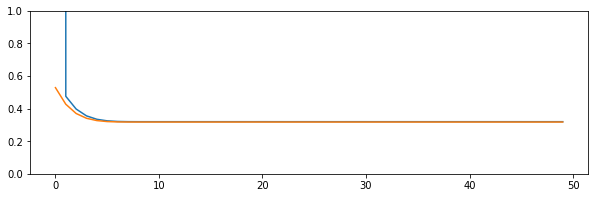

In [131]:
debug  = history.history
plt.plot(debug['loss'])
plt.plot(debug['val_loss'])
plt.rcParams["figure.figsize"] = (10,3)
plt.ylim(bottom=0, top=1)